In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

Ce document a pour objectif d'analyser le fichier des associations disponible sur data.gouv.fr avec un focus spécifique sur les associations autour du cancer de l'enfant dans le cadre du projet ACCE (dir. Besle)

Chargement du fichier

In [45]:
data = pd.read_csv("../../Downloads/rna_waldec_20180403.csv",sep=";", encoding = "ISO-8859-1")

/Users/emilien/anaconda3/envs/p35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,3,14,15,18,23,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.columns

Index(['id', 'id_ex', 'siret', 'rup_mi', 'gestion', 'date_creat', 'date_decla',
       'date_publi', 'date_disso', 'nature', 'groupement', 'titre',
       'titre_court', 'objet', 'objet_social1', 'objet_social2',
       'adrs_complement', 'adrs_numvoie', 'adrs_repetition', 'adrs_typevoie',
       'adrs_libvoie', 'adrs_distrib', 'adrs_codeinsee', 'adrs_codepostal',
       'adrs_libcommune', 'adrg_declarant', 'adrg_complemid',
       'adrg_complemgeo', 'adrg_libvoie', 'adrg_distrib', 'adrg_codepostal',
       'adrg_achemine', 'adrg_pays', 'dir_civilite', 'telephone', 'siteweb',
       'email', 'publiweb', 'observation', 'position', 'maj_time'],
      dtype='object')

In [70]:
data[0:10]

,id,id_ex,siret,rup_mi,gestion,date_creat,date_decla,date_publi,date_disso,nature,...,maj_time,num,velo,cancer,enfant,date_creation,year,maladie,myo,year_creation
0,W632007046,NaN,NaN,NaN,632P,2014-06-17,2015-01-21,2014-06-28,2015-01-20,D,...,2015-02-09 12:51:34,1,0.0,0.0,0.0,2014-06-17,2014.0,0.0,0.0,2014.0
1,W012000002,2/08825,NaN,NaN,691P,1983-10-10,2004-03-11,0001-01-01,0001-01-01,D,...,2008-02-12 14:40:18,1,0.0,0.0,0.0,1983-10-10,1983.0,0.0,0.0,1983.0
2,W012000005,0012011852,NaN,NaN,691P,2003-09-01,2005-01-25,0001-01-01,0001-01-01,D,...,2007-04-05 09:41:02,1,0.0,0.0,0.0,2003-09-01,2003.0,0.0,0.0,2003.0
3,W012000006,0012010354,NaN,NaN,691P,1999-02-11,2008-03-26,0001-01-01,2008-02-27,D,...,2008-07-11 16:17:06,1,0.0,0.0,0.0,1999-02-11,1999.0,0.0,0.0,1999.0
4,W033002617,NaN,NaN,NaN,033S,2008-05-19,2008-08-12,2008-05-31,0001-01-01,D,...,2008-08-14 10:56:23,1,0.0,0.0,0.0,2008-05-19,2008.0,0.0,0.0,2008.0
5,W423003687,NaN,NaN,NaN,423P,2008-07-02,2008-07-02,2008-07-19,0001-01-01,D,...,2008-08-14 10:52:33,1,0.0,0.0,0.0,2008-07-02,2008.0,0.0,0.0,2008.0
6,W441001349,NaN,NaN,NaN,441S,2012-03-29,2012-03-29,2012-04-07,0001-01-01,D,...,2012-04-07 12:46:15,1,0.0,0.0,0.0,2012-03-29,2012.0,0.0,0.0,2012.0
7,W012000017,0012012493,NaN,NaN,691P,2005-07-01,2006-09-27,1901-07-01,2006-09-18,D,...,2007-04-03 18:33:35,1,0.0,0.0,0.0,2005-07-01,2005.0,0.0,0.0,2005.0
8,W9P1000550,NaN,NaN,NaN,9P1P,2016-04-15,2016-04-15,0001-01-01,0001-01-01,D,...,2016-10-15 20:00:01,1,0.0,0.0,0.0,2016-04-15,2016.0,0.0,0.0,2016.0
9,W881003828,7778,NaN,NaN,881P,1977-06-07,2016-04-18,1977-06-19,0001-01-01,D,...,2016-04-18 15:30:56,1,0.0,0.0,0.0,1977-06-07,1977.0,0.0,0.0,1977.0


Recodage de variables

In [50]:
data['date_creation'] = pd.to_datetime(data['date_creat'],errors='coerce')
data['year_creation'] = data['date_creation'].apply(lambda x : x.year)
data['date_decla'] = pd.to_datetime(data['date_decla'],errors='coerce')
data["year_decla"] = data["date_decla"].apply(lambda x : x.year)
data['date_disso'] = pd.to_datetime(data['date_disso'],errors='coerce')
data["year_disso"] = data["date_disso"].apply(lambda x : x.year)
data["num"]=1

def duree(x):
    if pd.notnull(x["year_disso"]):
        return x["year_disso"]-x['year_creation']
    return 2018-x['year_creation']
data["duree"] = data.apply(duree,axis=1)
data[data["duree"]<0]=None

Identifier des mots clés dans le descriptif

In [47]:
def reco(x,u):
    if pd.isnull(x):
        return None
    if u in x:
        return 1
    return 0

data["velo"] = data["objet"].apply(lambda x : reco(x,"vélos"))
data["cancer"] = data["objet"].apply(lambda x : reco(x,"cancer"))
data["enfant"] = data["objet"].apply(lambda x : reco(x,"enfant"))

Création de variables indicatrices

In [118]:
data["indic_cancerenfant"] = (data["enfant"]==1) & (data["cancer"]==1)
data["indic_cancer"] = (data["cancer"]==1)
def cod(x):
    if x["indic_cancerenfant"]:
        return "Enfant"
    elif x["indic_cancer"]:
        return "Cancer"
    return "Autre"
data["type_cancer"] = data.apply(cod,axis=1)

## Analyses

### Quel âge ont les associations françaises (jusqu'à maintenant ou à leur dissolution) ?

Toutes les associations

(0, 150)

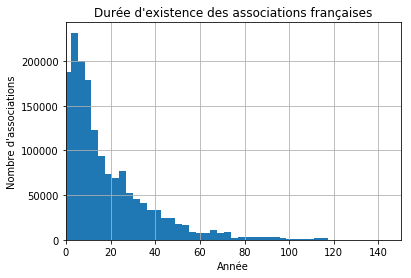

In [97]:
data["duree"].hist(bins=100)
plt.title("Durée d'existence des associations françaises")
plt.xlabel("Année")
plt.ylabel("Nombre d'associations")
plt.xlim(0,150)

Text(0,0.5,"Nombre d'associations")

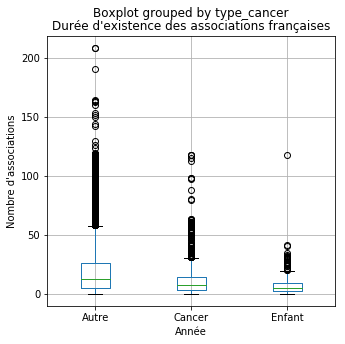

In [151]:
data.boxplot(column=["duree"], by="type_cancer",figsize=(5,5))
#.hist(bins=50,normed=True,alpha=0.5)
plt.title("Durée d'existence des associations françaises")
plt.xlabel("Année")
plt.ylabel("Nombre d'associations")


In [140]:
data.groupby("type_cancer")["duree"].agg(["mean","median","std"])

,mean,median,std
type_cancer,,,
Autre,18.367231,12.0,18.757541
Cancer,11.265369,7.0,14.106655
Enfant,7.333333,5.0,8.884461


### Qu'en est-il juste pour les associations qui sont dissoutes ?

In [150]:
data[pd.notnull(data["year_disso"])].groupby("type_cancer")["duree"].agg(["mean","median","std"])

,mean,median,std
type_cancer,,,
Autre,14.780612,9.0,16.134376
Cancer,10.120419,6.0,13.498193
Enfant,3.636364,3.0,3.407879


Clairement les associations cancers & enfants ont une durée de vie très courte 

Text(0,0.5,"Nombre d'associations")

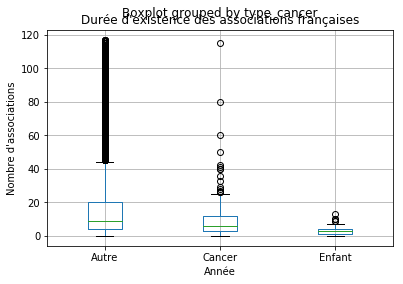

In [149]:
data[pd.notnull(data["year_disso"])].boxplot(column=["duree"], by="type_cancer")
#.hist(bins=50,normed=True,alpha=0.5)
plt.title("Durée d'existence des associations françaises")
plt.xlabel("Année")
plt.ylabel("Nombre d'associations")


### Quand ces associations ont elles été créées ?

Année de la création

(1900, 2020)

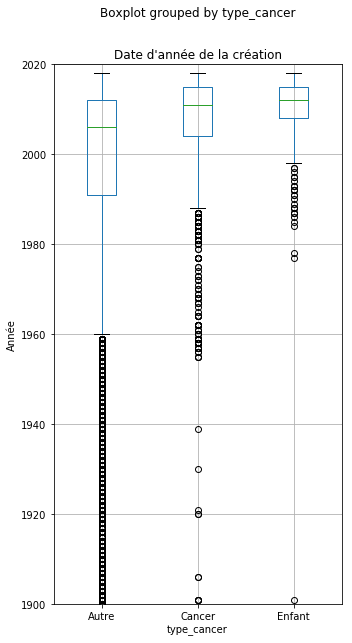

In [145]:
data.boxplot(column=["year_creation"], by="type_cancer",figsize=(5,10))
#.hist(bins=50,normed=True,alpha=0.5)
plt.title("Date d'année de la création")
plt.ylabel("Année")
plt.ylim(1900,2020)

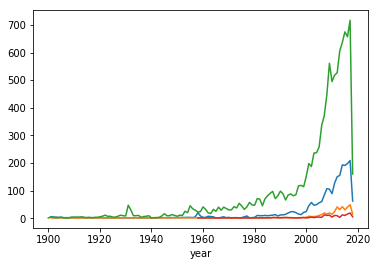

In [67]:
ax = data[(data["cancer"]==1)].groupby("year")["num"].count().plot()
data[(data["enfant"]==1) & (data["cancer"]==1)].groupby("year")["num"].count().plot(ax=ax)
data[(data["maladie"]==1)].groupby("year")["num"].count().plot(ax=ax)
data[(data["myo"]==1)].groupby("year")["num"].count().plot(ax=ax)

### Intitulés

In [159]:
data[data["indic_cancerenfant"]==1]["objet"]

560        Aider les enfants pauvres d'Afrique atteints d...
3652       Registre destine a enregistrer tous les nouvea...
13687      Cette association a pour but d'apporter un sou...
14357      organiser la manifestation intitulée " la Litt...
16372      aide à la scolarisation et à l'éducation sport...
16642      soutenir la recherche médicale pour l'améliora...
20154      organiser divers événements afin de récolter d...
24780      l'association dite "VICTOiR" est une associati...
29880      mobilise toutes les energies et favorise les c...
30314      aide directe aux enfants atteints de maladies ...
33041      aide, soutien et amélioration du bien-être aux...
35614      récolter des fonds pour les enfants atteints d...
38935      soutenir les familles nécessitantes de l 'aide...
38965      favoriser la recherche sur les cancers et leuc...
53034      venir en aide aux enfants malades et à leur fa...
53414      création d'un village pour l'accueil et l'hébe...
60698      organiser des